In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Normalise the dataset
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# Reshape the data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [5]:
# Encoding the label using One-Hot encoder
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Step 2: Build a Model
Creating a simple Convolution Neurall Network model as a starting point

In [30]:
model = tf.keras.models.Sequential()
##Conv1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
##Conv2
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
#Flatten
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))


In [31]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
hisroty=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9662 - loss: 0.1078 - val_accuracy: 0.9855 - val_loss: 0.0435
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9676 - loss: 0.1083 - val_accuracy: 0.9856 - val_loss: 0.0428
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9682 - loss: 0.1058 - val_accuracy: 0.9855 - val_loss: 0.0410
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9677 - loss: 0.1050 - val_accuracy: 0.9865 - val_loss: 0.0391
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9698 - loss: 0.1009 - val_accuracy: 0.9867 - val_loss: 0.0371
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9715 - loss: 0.0957 - val_accuracy: 0.9874 - val_loss: 0.0353
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9723 - loss: 0.0902 - val_accuracy: 0.9875 - val_loss: 0.0366
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9728 -

In [32]:
optimizer = tf.keras.optimizers.SGD(learning_rate = initial_lr)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
#hyperparameters
initial_lr = 0.01
batch_size = 128
epochs = 10

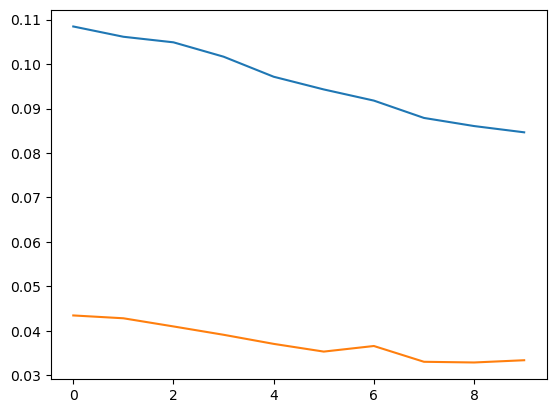

In [42]:
plt.plot(hisroty.history['loss'])
plt.plot(hisroty.history['val_loss'])

In [37]:
import matplotlib.pyplot as plt

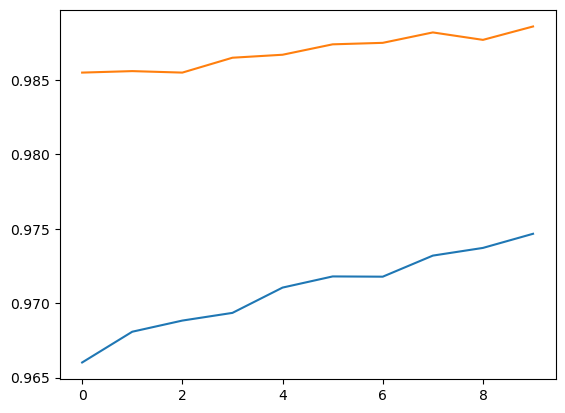

In [43]:
plt.plot(hisroty.history['accuracy'])
plt.plot(hisroty.history['val_accuracy'])